In [103]:
import pandas as pd
import numpy as np


1) Data Cleaning 
        - convert categorical into continuous
        - handle outliers
        - handle missing value
2) EDA
        - visualization using various graphs
            - univariant
                - target variable (box plot or line chart or histogram )
            -Bivariant
                - cont-cont(heat map or scatter plot)
                - cont-cat(barplot)
                - cat-cat(use countplot with hue as target variable)
3) split data into training and testing
        -Feature scaling
        - looking at correlation using heatmap remove highly correlated dummy variables
4) Model Building
5) Model evaluation

#### Step1 ) Read/Merge the data
#### Step2) Inspecting the dataframe :
        a) df.head()
        b)df.shape
        c)df.describe()
        d) df.info()
#### Step3) Data Preprocessing:
        a) convert categorical into continuous : encoding , 
                dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)
                # Adding the results to the master dataframe
                telecom = pd.concat([telecom, dummy1], axis=1)
                
        b) checking for outliers and handle using IQR
        c) checking for missing values and inputing them
#### Step4) Test-Train Split
#### Step5) Feature Scaling[for linear Model]
                import sklear.preprocessing import StandardScaler
                scaler = StandardScaler()
                x_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])
                x_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(x_test[['tenure','MonthlyCharges','TotalCharges']])
#### Step6) Looking at Correlation
                - Remove highly correlated variables
                

In [104]:
movie_data = pd.read_csv(r'rotten_tomatoes_movies.csv')
movie_data.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


In [105]:
movie_data.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [163]:


movie_data.shape


(17712, 22)

In [164]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [165]:
movie_data.tomatometer_status.value_counts(normalize = True) # this is y

tomatometer_status
Rotten             0.428175
Fresh              0.387367
Certified-Fresh    0.184458
Name: proportion, dtype: float64

In [166]:
movie_critics = pd.read_csv(r'rotten_tomatoes_critic_reviews.csv')
movie_critics.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [167]:
movie_critics.shape , movie_data.shape

((1130017, 8), (17712, 22))

Combining all the data files into the one consolidated dataframe

In [168]:
# join the two table

full_data = movie_data.merge(movie_critics , how='inner' , on='rotten_tomatoes_link')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129887 entries, 0 to 1129886
Data columns (total 29 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   rotten_tomatoes_link              1129887 non-null  object 
 1   movie_title                       1129887 non-null  object 
 2   movie_info                        1120202 non-null  object 
 3   critics_consensus                 991907 non-null   object 
 4   content_rating                    1129887 non-null  object 
 5   genres                            1129642 non-null  object 
 6   directors                         1115423 non-null  object 
 7   authors                           1075164 non-null  object 
 8   actors                            1119492 non-null  object 
 9   original_release_date             1106787 non-null  object 
 10  streaming_release_date            1119728 non-null  object 
 11  runtime                           112

Data Preporocessing: Missing values , outliers

In [169]:
full_data.isna().sum()

rotten_tomatoes_link                     0
movie_title                              0
movie_info                            9685
critics_consensus                   137980
content_rating                           0
genres                                 245
directors                            14464
authors                              54723
actors                               10395
original_release_date                23100
streaming_release_date               10159
runtime                               8264
production_company                   11826
tomatometer_status                    1466
tomatometer_rating                    1466
tomatometer_count                     1466
audience_status                      36721
audience_rating                       4289
audience_count                        4657
tomatometer_top_critics_count            0
tomatometer_fresh_critics_count          0
tomatometer_rotten_critics_count         0
critic_name                          18521
top_critic 

Step2) Inspecting the dataframe

In [170]:
full_data.shape

(1129887, 29)

In [171]:
# missing value percentage in data : No column has sufficient missing percentage
missing_column = full_data.isna().sum().reset_index()
missing_column.columns = ['name','value']
missing_column['total_rows'] = full_data.shape[0]
missing_column.head(5)
missing_column['missing_%_value'] = (missing_column['value'] /missing_column['total_rows'])*100
missing_column

,name,value,total_rows,missing_%_value
0,rotten_tomatoes_link,0,1129887,0.000000
1,movie_title,0,1129887,0.000000
2,movie_info,9685,1129887,0.857165
3,critics_consensus,137980,1129887,12.211841
4,content_rating,0,1129887,0.000000
5,genres,245,1129887,0.021684
6,directors,14464,1129887,1.280128
7,authors,54723,1129887,4.843228
8,actors,10395,1129887,0.920004
9,original_release_date,23100,1129887,2.044452


In [177]:
data = full_data[['content_rating','original_release_date','streaming_release_date','runtime','tomatometer_status','tomatometer_rating','tomatometer_count',
           'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'top_critic', 'review_type',
       'review_score', 'review_date']]

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129887 entries, 0 to 1129886
Data columns (total 17 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   content_rating                    1129887 non-null  object 
 1   original_release_date             1106787 non-null  object 
 2   streaming_release_date            1119728 non-null  object 
 3   runtime                           1121623 non-null  float64
 4   tomatometer_status                1128421 non-null  object 
 5   tomatometer_rating                1128421 non-null  float64
 6   tomatometer_count                 1128421 non-null  float64
 7   audience_status                   1093166 non-null  object 
 8   audience_rating                   1125598 non-null  float64
 9   audience_count                    1125230 non-null  float64
 10  tomatometer_top_critics_count     1129887 non-null  int64  
 11  tomatometer_fresh_critics_count   112

In [179]:
data.isna().sum()

content_rating                           0
original_release_date                23100
streaming_release_date               10159
runtime                               8264
tomatometer_status                    1466
tomatometer_rating                    1466
tomatometer_count                     1466
audience_status                      36721
audience_rating                       4289
audience_count                        4657
tomatometer_top_critics_count            0
tomatometer_fresh_critics_count          0
tomatometer_rotten_critics_count         0
top_critic                               0
review_type                              0
review_score                        305902
review_date                              0
dtype: int64

In [180]:
data['original_release_date'] = pd.to_datetime(data['original_release_date'])
data['original_release_date'].head()


/var/folders/zv/2d04czqj0pdg7tx96g6xj01m0000gq/T/ipykernel_86574/2698229960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['original_release_date'] = pd.to_datetime(data['original_release_date'])


0   2010-02-12
1   2010-02-12
2   2010-02-12
3   2010-02-12
4   2010-02-12
Name: original_release_date, dtype: datetime64[ns]

In [181]:
data['streaming_release_date'] = pd.to_datetime(data['streaming_release_date'])
data['streaming_release_date'].head()

/var/folders/zv/2d04czqj0pdg7tx96g6xj01m0000gq/T/ipykernel_86574/2916889510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['streaming_release_date'] = pd.to_datetime(data['streaming_release_date'])


0   2015-11-25
1   2015-11-25
2   2015-11-25
3   2015-11-25
4   2015-11-25
Name: streaming_release_date, dtype: datetime64[ns]

In [182]:
data.fillna(data.median(numeric_only=True), inplace = True)


/var/folders/zv/2d04czqj0pdg7tx96g6xj01m0000gq/T/ipykernel_86574/859528190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.median(numeric_only=True), inplace = True)


In [183]:
data['review_score'] = data['review_score'].fillna(data['review_score'].mode())
data['audience_status'] = data['audience_count'].fillna(data['audience_status'].mode())

/var/folders/zv/2d04czqj0pdg7tx96g6xj01m0000gq/T/ipykernel_86574/4141175735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review_score'] = data['review_score'].fillna(data['review_score'].mode())
/var/folders/zv/2d04czqj0pdg7tx96g6xj01m0000gq/T/ipykernel_86574/4141175735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['audience_status'] = data['audience_count'].fillna(data['audience_status'].mode())


In [184]:
# remove the rows where y(tomatometer_status) value is not defined

data.dropna(subset=['tomatometer_status'], axis = 0, inplace=True)

/var/folders/zv/2d04czqj0pdg7tx96g6xj01m0000gq/T/ipykernel_86574/3121949092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['tomatometer_status'], axis = 0, inplace=True)


In [185]:
data.isna().sum()

content_rating                           0
original_release_date                22840
streaming_release_date                9082
runtime                                  0
tomatometer_status                       0
tomatometer_rating                       0
tomatometer_count                        0
audience_status                          0
audience_rating                          0
audience_count                           0
tomatometer_top_critics_count            0
tomatometer_fresh_critics_count          0
tomatometer_rotten_critics_count         0
top_critic                               0
review_type                              0
review_score                        305438
review_date                              0
dtype: int64

In [186]:
# Feature Engineering
data['days_between_streaming_release'] = data['streaming_release_date'] - data['original_release_date']
data['days_between_streaming_release'] = data['days_between_streaming_release'].apply(lambda x: x.days)

# Removing unwanted columns
data.drop(['original_release_date','streaming_release_date','review_date'], axis =1 , inplace=True)

/var/folders/zv/2d04czqj0pdg7tx96g6xj01m0000gq/T/ipykernel_86574/3448825377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['days_between_streaming_release'] = data['streaming_release_date'] - data['original_release_date']
/var/folders/zv/2d04czqj0pdg7tx96g6xj01m0000gq/T/ipykernel_86574/3448825377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['days_between_streaming_release'] = data['days_between_streaming_release'].apply(lambda x: x.days)
/var/folders/zv/2d04czqj0pdg7tx96g6xj01m0000gq/T

In [187]:
# EDA

import seaborn as sns
import matplotlib.pyplot as plt


In [188]:
data_cont = data.drop(['content_rating','tomatometer_status','top_critic','review_type','review_score'], axis =1)
data_cat = data[['content_rating','tomatometer_status','top_critic','review_type','review_score']]

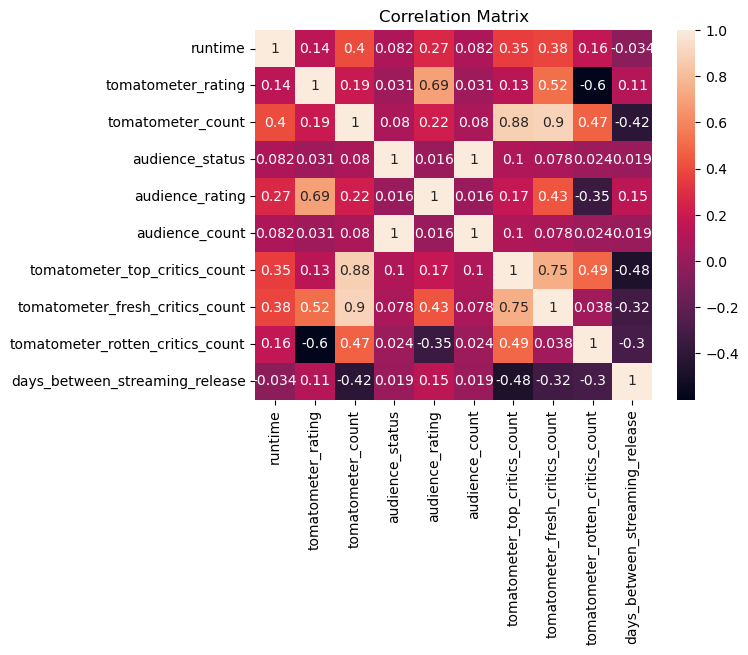

In [189]:
sns.heatmap(data_cont.corr() , annot=True) # no effective correlation
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='tomatometer_status', ylabel='audience_rating'>

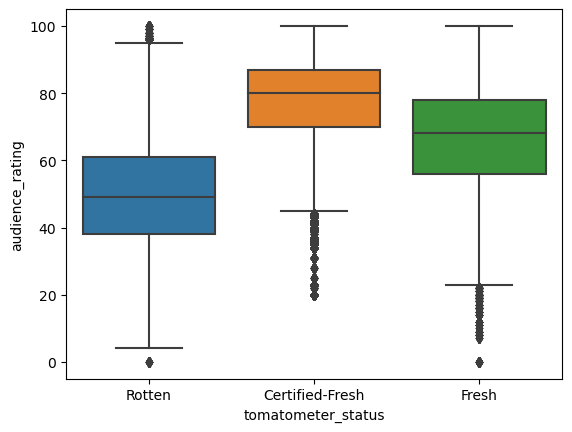

In [190]:
sns.boxplot(data = data , x = 'tomatometer_status' , y ='audience_rating')

In [191]:
data_cont.columns , data_cat.columns

(Index(['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_status',
        'audience_rating', 'audience_count', 'tomatometer_top_critics_count',
        'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
        'days_between_streaming_release'],
       dtype='object'),
 Index(['content_rating', 'tomatometer_status', 'top_critic', 'review_type',
        'review_score'],
       dtype='object'))

<Axes: xlabel='tomatometer_status', ylabel='days_between_streaming_release'>

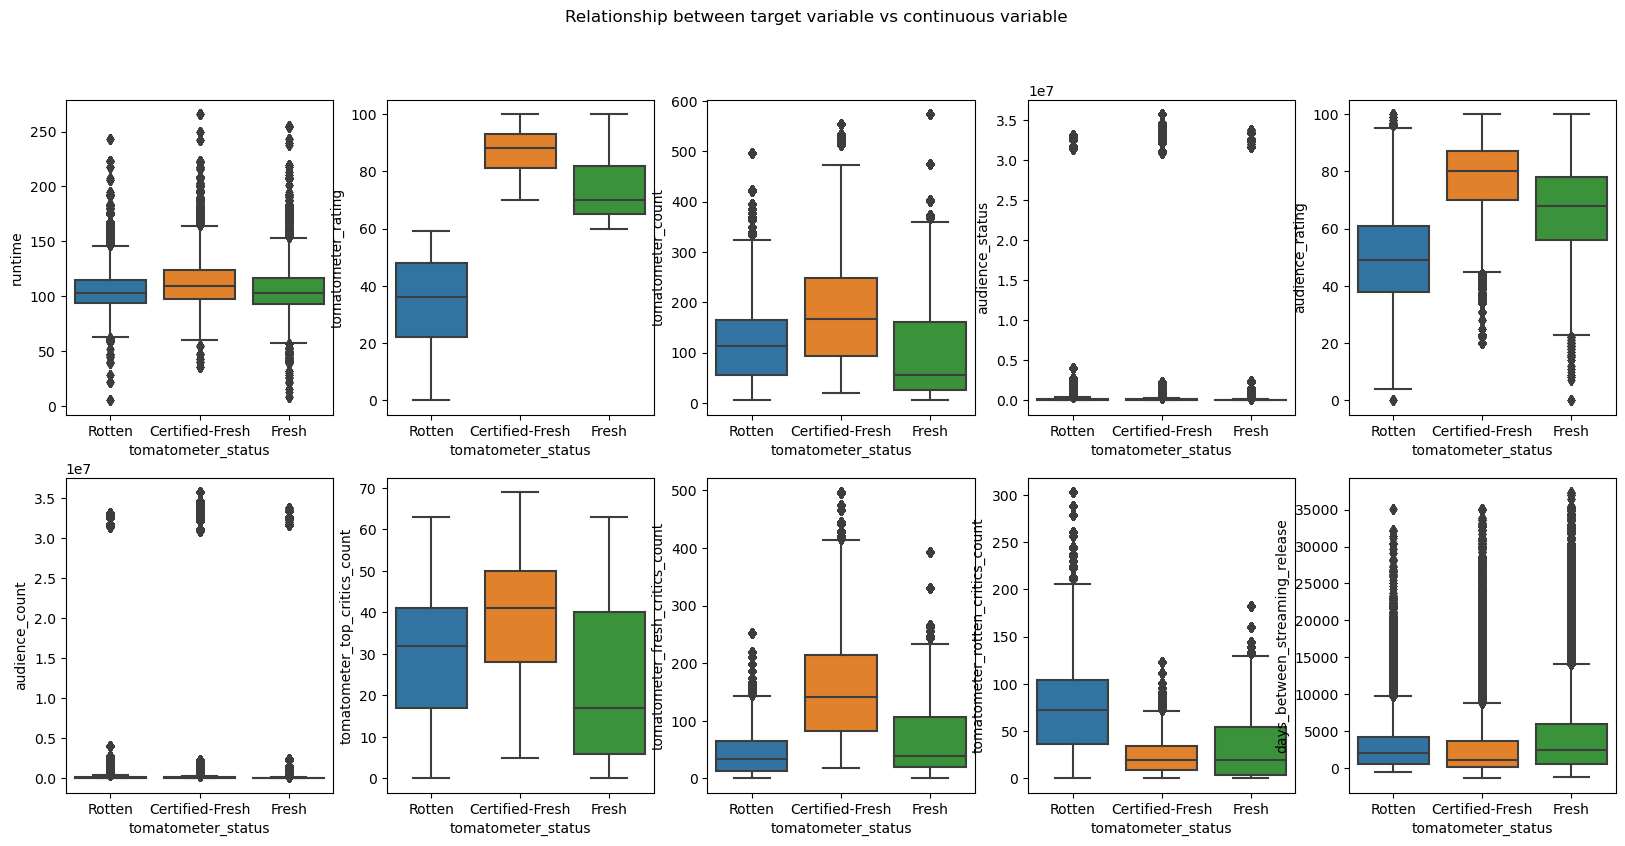

In [192]:
fig, axes = plt.subplots(2,5 , figsize =(20,9))
fig.suptitle('Relationship between target variable vs continuous variable')

sns.boxplot(ax = axes[0,0] , data = data , x='tomatometer_status' , y ='runtime')
sns.boxplot(ax = axes[0,1] , data = data , x='tomatometer_status' , y ='tomatometer_rating')
sns.boxplot(ax = axes[0,2] , data = data , x='tomatometer_status' , y ='tomatometer_count')
sns.boxplot(ax = axes[0,3] , data = data , x='tomatometer_status' , y ='audience_status')
sns.boxplot(ax = axes[0,4] , data = data , x='tomatometer_status' , y ='audience_rating')



sns.boxplot(ax = axes[1,0] , data = data , x='tomatometer_status' , y ='audience_count')
sns.boxplot(ax = axes[1,1] , data = data , x='tomatometer_status' , y ='tomatometer_top_critics_count')
sns.boxplot(ax = axes[1,2] , data = data , x='tomatometer_status' , y ='tomatometer_fresh_critics_count')
sns.boxplot(ax = axes[1,3] , data = data , x='tomatometer_status' , y ='tomatometer_rotten_critics_count')
sns.boxplot(ax = axes[1,4] , data = data , x='tomatometer_status' , y ='days_between_streaming_release')



In [193]:
data.isna().sum()

content_rating                           0
runtime                                  0
tomatometer_status                       0
tomatometer_rating                       0
tomatometer_count                        0
audience_status                          0
audience_rating                          0
audience_count                           0
tomatometer_top_critics_count            0
tomatometer_fresh_critics_count          0
tomatometer_rotten_critics_count         0
top_critic                               0
review_type                              0
review_score                        305438
days_between_streaming_release       30158
dtype: int64

In [194]:
data['days_between_streaming_release'] = data['days_between_streaming_release'].fillna(data['days_between_streaming_release'].mean())
data.drop(columns=['review_score'],axis =1 ,inplace= True)

/var/folders/zv/2d04czqj0pdg7tx96g6xj01m0000gq/T/ipykernel_86574/1137260876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['days_between_streaming_release'] = data['days_between_streaming_release'].fillna(data['days_between_streaming_release'].mean())
/var/folders/zv/2d04czqj0pdg7tx96g6xj01m0000gq/T/ipykernel_86574/1137260876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['review_score'],axis =1 ,inplace= True)


In [195]:
# using Label Encoding
data['tomatometer_status'].replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2] , inplace = True)
data['content_rating'].replace(['R','PG-13','NR','PG','G','NC17'],[0,1,2,3,4,5],inplace=True)
#data['top_critic'].replace(['False','True'],[0,1], inplace=True)
data['review_type'].replace(['Rotten','Fresh'],[0,1], inplace=True)

/var/folders/zv/2d04czqj0pdg7tx96g6xj01m0000gq/T/ipykernel_86574/2496107765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tomatometer_status'].replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2] , inplace = True)
/var/folders/zv/2d04czqj0pdg7tx96g6xj01m0000gq/T/ipykernel_86574/2496107765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content_rating'].replace(['R','PG-13','NR','PG','G','NC17'],[0,1,2,3,4,5],inplace=True)
/var/folders/zv/2d04czqj0pdg7tx96g6xj01m0000gq/T/ipykernel_86574/2496107765.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

In [196]:
data.drop(columns=['top_critic'],inplace=True)

/var/folders/zv/2d04czqj0pdg7tx96g6xj01m0000gq/T/ipykernel_86574/4142617722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['top_critic'],inplace=True)


In [197]:
from sklearn.model_selection import train_test_split

y = data['tomatometer_status']
X = data.drop(columns = ['tomatometer_status'], axis = 1)

In [198]:
# one hot encoding on training and testing seperately

# one hot encoding
train_x , test_x , train_y , test_y = train_test_split(X , y , test_size=0.3 , stratify=y , random_state=42)

train_x.shape , train_y.shape , test_x.shape , test_y.shape

((789894, 12), (789894,), (338527, 12), (338527,))

In [199]:
train_x.head(2)

,content_rating,runtime,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,review_type,days_between_streaming_release
1099982,0,95.0,91.0,74.0,396030.0,89.0,396030.0,19,67,7,1,10001.0
426442,3,97.0,62.0,118.0,3485.0,48.0,3485.0,25,73,45,0,75.0


In [200]:
# logistic Regression
\
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report , confusion_matrix



In [201]:
lg = LogisticRegression()
lg.fit(train_x , train_y)
lg_pred = lg.predict(test_x)
print(classification_report(test_y , lg_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    131226
           1       1.00      0.00      0.00     75025
           2       0.39      1.00      0.56    132276

    accuracy                           0.39    338527
   macro avg       0.46      0.33      0.19    338527
weighted avg       0.37      0.39      0.22    338527



In [202]:
confusion_matrix(test_y , lg_pred)

array([[     0,      0, 131226],
       [     7,     10,  75008],
       [     0,      0, 132276]])

In [203]:
dt = DecisionTreeClassifier(max_depth=3 , random_state= 42)
dt.fit(train_x , train_y)
dt_pred = dt.predict(test_x)
print(classification_report(test_y , dt_pred))
confusion_matrix(test_y , dt_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    131226
           1       0.94      0.98      0.96     75025
           2       0.99      0.97      0.98    132276

    accuracy                           0.98    338527
   macro avg       0.98      0.98      0.98    338527
weighted avg       0.98      0.98      0.98    338527



array([[131226,      0,      0],
       [     0,  73746,   1279],
       [     0,   4506, 127770]])

In [204]:
train_x.columns

Index(['content_rating', 'runtime', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'review_type',
       'days_between_streaming_release'],
      dtype='object')

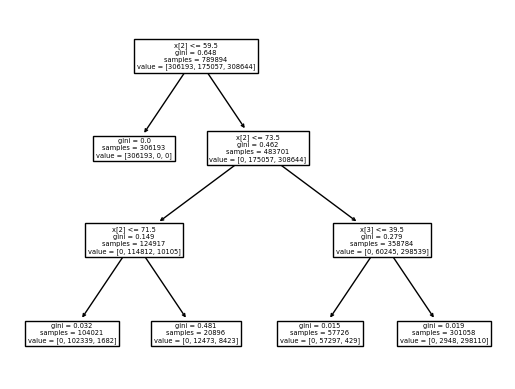

In [205]:
from sklearn import tree
#fig , ax = plt.subplots(figsize =(12,9))
tree.plot_tree(dt )
plt.show()

In [206]:
train_x.columns

Index(['content_rating', 'runtime', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'review_type',
       'days_between_streaming_release'],
      dtype='object')

In [215]:
rf = RandomForestClassifier(random_state=42 ,max_depth=3)
rf.fit(train_x , train_y)
rf_pred = rf.predict(test_x)
print(classification_report(test_y ,rf_pred))
confusion_matrix(test_y , rf_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    131226
           1       0.96      0.78      0.86     75025
           2       0.89      0.98      0.93    132276

    accuracy                           0.95    338527
   macro avg       0.95      0.92      0.93    338527
weighted avg       0.95      0.95      0.94    338527



array([[131226,      0,      0],
       [     0,  58844,  16181],
       [     0,   2200, 130076]])

In [216]:
rf_var = pd.DataFrame(rf.feature_importances_)
rf_var['columns'] = train_x.columns
rf_var

,0,columns
0,0.001498,content_rating
1,0.000542,runtime
2,0.442257,tomatometer_rating
3,0.050608,tomatometer_count
4,0.005536,audience_status
5,0.114315,audience_rating
6,0.005048,audience_count
7,0.028389,tomatometer_top_critics_count
8,0.185089,tomatometer_fresh_critics_count
9,0.126302,tomatometer_rotten_critics_count


In [209]:
#!pip install xgboost

In [220]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state = 42 , max_depth =3 )
xg.fit(train_x , train_y)
pred_xg = xg.predict(test_x)
print(classification_report(test_y ,pred_xg))
confusion_matrix(test_y ,pred_xg)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    131226
           1       1.00      1.00      1.00     75025
           2       1.00      1.00      1.00    132276

    accuracy                           1.00    338527
   macro avg       1.00      1.00      1.00    338527
weighted avg       1.00      1.00      1.00    338527



array([[131226,      0,      0],
       [     0,  74909,    116],
       [     0,    173, 132103]])

In [211]:

xg_var = pd.DataFrame(xg.feature_importances_)
xg_var['columns'] = train_x.columns
xg_var

,0,columns
0,0.006377,content_rating
1,0.003189,runtime
2,0.687607,tomatometer_rating
3,0.271139,tomatometer_count
4,0.005674,audience_status
5,0.002643,audience_rating
6,0.000000,audience_count
7,0.007691,tomatometer_top_critics_count
8,0.004964,tomatometer_fresh_critics_count
9,0.004800,tomatometer_rotten_critics_count


<Axes: xlabel='tomatometer_status', ylabel='tomatometer_rating'>

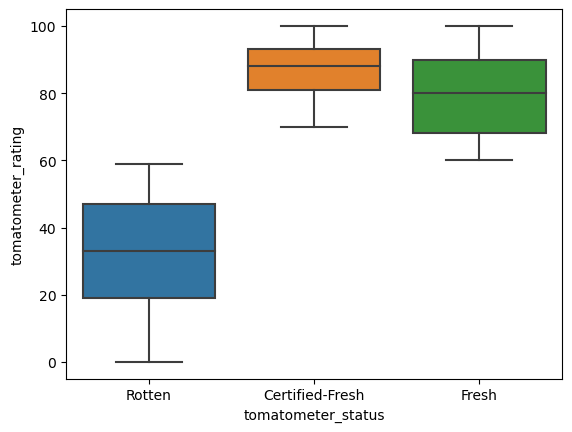

In [212]:
sns.boxplot(data = movie_data , y= 'tomatometer_rating',x = 'tomatometer_status')

In [213]:
movie_data['tomatometer_rating']

0         49.0
1         87.0
2         67.0
3        100.0
4         89.0
         ...  
17707     56.0
17708     98.0
17709     80.0
17710     96.0
17711     50.0
Name: tomatometer_rating, Length: 17712, dtype: float64